Introduction
The purpose of this project is to evaluate the house price difference between Houston and Chicago
Zillow provided Zillow Home Value Index(ZHVI) as a smoothed, seasonally adjusted measure of the typical home value across a given region and housing type.
I focused on single-family residences for my research.

#Section 1
Step 1 is Data Wrangling. I will load data from  this webpage.
The house price data is downloaded from https://www.zillow.com/research/data/, I used ZHVI Single-Family Homes Time Series in Metro & U.S.
The downloaded file name is called "Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv"    

In [59]:
#load python packages
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import requests
import json

In [2]:
os.getcwd()

'C:\\Users\\Grace-2019\\Documents\\CapstoneProject_Houston_Chicago_house_price'

In [3]:
# read the house price file
file1 = "Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv" 
df1=pd.read_csv(file1, delimiter=',')

In [4]:
df1.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30
0,102001,0,United States,Country,NaN,106752.0,106784.0,106839.0,106974.0,107126.0,...,242460.0,243283.0,244088.0,244909.0,245771.0,246708.0,247737.0,248783.0,249707.0,250604.0
1,394913,1,"New York, NY",Msa,NY,192273.0,191824.0,191540.0,190990.0,190654.0,...,481362.0,481472.0,481698.0,482269.0,483093.0,484035.0,484956.0,485911.0,486824.0,487870.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,194120.0,194423.0,194458.0,194605.0,194608.0,...,705972.0,708697.0,710535.0,713159.0,716361.0,721125.0,725613.0,728709.0,728618.0,727713.0
3,394463,3,"Chicago, IL",Msa,IL,164910.0,164604.0,164198.0,163735.0,163116.0,...,246189.0,246205.0,246213.0,246338.0,246574.0,246841.0,247228.0,247432.0,247577.0,247747.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,112171.0,112242.0,112402.0,112720.0,113060.0,...,253838.0,254282.0,254687.0,254912.0,255366.0,256022.0,256977.0,258030.0,259028.0,260182.0
5,394974,5,"Philadelphia, PA",Msa,PA,123205.0,123051.0,122912.0,122671.0,122509.0,...,254062.0,254657.0,255177.0,255870.0,256645.0,257534.0,258135.0,259090.0,260083.0,261581.0
6,394692,6,"Houston, TX",Msa,TX,110240.0,110304.0,110312.0,110452.0,110592.0,...,218869.0,219367.0,219921.0,220480.0,220671.0,221051.0,221694.0,222559.0,223223.0,223709.0
7,395209,7,"Washington, DC",Msa,DC,189204.0,188967.0,188830.0,188540.0,188395.0,...,456607.0,458191.0,459800.0,461076.0,462081.0,462978.0,464225.0,466064.0,467831.0,469815.0
8,394856,8,"Miami-Fort Lauderdale, FL",Msa,FL,125265.0,125439.0,125614.0,125937.0,126218.0,...,345322.0,346312.0,347011.0,347527.0,348243.0,350031.0,351396.0,352685.0,353734.0,354828.0
9,394347,9,"Atlanta, GA",Msa,GA,121975.0,122206.0,122429.0,122922.0,123407.0,...,239395.0,240196.0,240975.0,241936.0,243053.0,244269.0,245396.0,246517.0,247571.0,248908.0


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,915.0,414861.361749,83829.704753,102001.0,394547.50,394802.0,395049.5,753929.0
SizeRank,915.0,460.206557,268.414169,0.0,228.50,457.0,689.5,933.0
1996-01-31,430.0,93191.404651,44910.141489,25765.0,62011.25,84616.0,111944.5,322545.0
1996-02-29,432.0,93192.766204,44732.356206,25782.0,62070.00,84691.0,111725.0,321175.0
1996-03-31,433.0,93206.399538,44663.928140,25791.0,62167.00,84701.0,111325.0,319635.0
...,...,...,...,...,...,...,...,...
2020-02-29,915.0,192355.950820,128859.834117,32560.0,117681.00,155440.0,226203.5,1238106.0
2020-03-31,915.0,192959.147541,129379.472267,32492.0,118147.00,155916.0,227227.5,1250734.0
2020-04-30,915.0,193507.190164,129752.783328,32402.0,118073.50,156280.0,228080.5,1256029.0
2020-05-31,915.0,194007.596721,130034.998537,32290.0,117971.00,157017.0,228599.0,1259468.0


In [6]:
df1.info

<bound method DataFrame.info of      RegionID  SizeRank                          RegionName RegionType  \
0      102001         0                       United States    Country   
1      394913         1                        New York, NY        Msa   
2      753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   
3      394463         3                         Chicago, IL        Msa   
4      394514         4               Dallas-Fort Worth, TX        Msa   
..        ...       ...                                 ...        ...   
910    394767       929                          Lamesa, TX        Msa   
911    753874       930                           Craig, CO        Msa   
912    394968       931                           Pecos, TX        Msa   
913    395188       932                          Vernon, TX        Msa   
914    394743       933                       Ketchikan, AK        Msa   

    StateName  1996-01-31  1996-02-29  1996-03-31  1996-04-30  1996-05-31  \
0 

In [7]:
df1.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2020-02-29    float64
2020-03-31    float64
2020-04-30    float64
2020-05-31    float64
2020-06-30    float64
Length: 299, dtype: object

In [8]:
# read time series for houston and chicago price data
df_two_city = df1.iloc[[3,6]]
drop_column = ['RegionID','SizeRank','RegionName', 'RegionType','StateName']
df_two_city_ts=df_two_city.drop(drop_column, axis = 1).T
df_two_city_ts.index = pd.to_datetime(df_two_city_ts.index)
df_two_city_ts.rename(columns={3:'Chicago',6:'Houston'},inplace=True)
df_two_city_ts.index.names=['Date']
df_two_city_ts

,Chicago,Houston
Date,,
1996-01-31,164910.0,110240.0
1996-02-29,164604.0,110304.0
1996-03-31,164198.0,110312.0
1996-04-30,163735.0,110452.0
1996-05-31,163116.0,110592.0
...,...,...
2020-02-29,246841.0,221051.0
2020-03-31,247228.0,221694.0
2020-04-30,247432.0,222559.0


# Step 2

data exploratory analysis

In [9]:
df_two_city_ts['1996']

,Chicago,Houston
Date,,
1996-01-31,164910.0,110240.0
1996-02-29,164604.0,110304.0
1996-03-31,164198.0,110312.0
1996-04-30,163735.0,110452.0
1996-05-31,163116.0,110592.0
1996-06-30,162779.0,110689.0
1996-07-31,162288.0,110727.0
1996-08-31,162855.0,110782.0
1996-09-30,163676.0,110946.0


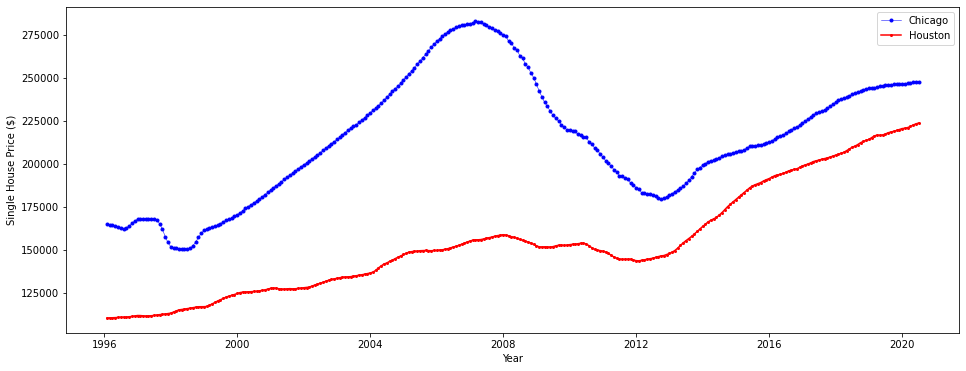

In [10]:
# Start and end of the date range to extract
start, end = '1996-01', '2020-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df_two_city_ts.loc[start:end, 'Chicago'],
marker='.', linestyle='-', linewidth=0.5,color='blue', label='Chicago')
ax.plot(df_two_city_ts.loc[start:end, 'Houston'],
marker='o', markersize=2, linestyle='-', color = 'red',label='Houston')
ax.set_ylabel('Single House Price ($)')
ax.set_xlabel('Year')
ax.legend();

Section 2: Population Data
Step 1: Data wrangling
population data was downloaded from https://www.census.gov/data/datasets/time-series/demo/popest/2010s-total-cities-and-towns.html. Data is in Excel format and has headers.

In [11]:
file2 = "SUB-IP-EST2019-ANNRNK.xlsx"
df2=pd.read_excel(file2, header=3)
df2.head(10)

,Unnamed: 0,Unnamed: 1,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,"New York city, New York",8175133,8175031.0,8190209.0,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0
1,2,"Los Angeles city, California",3792621,3793139.0,3795512.0,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0
2,3,"Chicago city, Illinois",2695598,2695652.0,2697477.0,2708114.0,2719141.0,2725731.0,2727066.0,2724344.0,2716723.0,2711069.0,2701423.0,2693976.0
3,4,"Houston city, Texas",2099451,2095517.0,2100280.0,2126032.0,2161593.0,2199391.0,2241826.0,2286908.0,2309544.0,2316750.0,2318573.0,2320268.0
4,5,"Phoenix city, Arizona",1445632,1446691.0,1449038.0,1469796.0,1499274.0,1526491.0,1555445.0,1583690.0,1612199.0,1633560.0,1654675.0,1680992.0
5,6,"Philadelphia city, Pennsylvania",1526006,1526012.0,1528283.0,1540466.0,1551824.0,1558313.0,1565460.0,1571065.0,1576051.0,1580601.0,1583592.0,1584064.0
6,7,"San Antonio city, Texas",1327407,1326161.0,1332299.0,1357120.0,1383075.0,1408339.0,1435456.0,1464043.0,1487843.0,1511154.0,1530016.0,1547253.0
7,8,"San Diego city, California",1307402,1301929.0,1305906.0,1319592.0,1336776.0,1355320.0,1375831.0,1387323.0,1402089.0,1412621.0,1421917.0,1423851.0
8,9,"Dallas city, Texas",1197816,1197658.0,1200350.0,1218282.0,1242115.0,1258835.0,1279098.0,1301329.0,1323916.0,1342479.0,1341802.0,1343573.0
9,10,"San Jose city, California",945942,952528.0,954940.0,970369.0,983530.0,1001279.0,1014273.0,1025980.0,1030242.0,1032335.0,1028020.0,1021795.0


In [12]:
df2.shape

(793, 14)

Step 2 Data Exploratory Analysis
1. I want to check the population distribution of top ten cities in US

In [13]:
df2.columns

Index([    'Unnamed: 0',     'Unnamed: 1',         'Census', 'Estimates Base',
                   2010,             2011,             2012,             2013,
                   2014,             2015,             2016,             2017,
                   2018,             2019],
      dtype='object')

In [14]:
# Use 2019 July 1 estimation to select top ten cities. 
pop_2019_top10 = df2[2019][:10]
label = df2.iloc[:,1][:10]

In [15]:
label2=label.str.split(',').str[0]
label2

0        New York city
1     Los Angeles city
2         Chicago city
3         Houston city
4         Phoenix city
5    Philadelphia city
6     San Antonio city
7       San Diego city
8          Dallas city
9        San Jose city
Name: Unnamed: 1, dtype: object

In [16]:
#simplify the city names for plotting
label3=[]
for word in label2:
    word=word.replace('city','')
    label3.append(word)
label3

['New York ',
 'Los Angeles ',
 'Chicago ',
 'Houston ',
 'Phoenix ',
 'Philadelphia ',
 'San Antonio ',
 'San Diego ',
 'Dallas ',
 'San Jose ']

In [17]:
pop_2019_top10

0    8336817.0
1    3979576.0
2    2693976.0
3    2320268.0
4    1680992.0
5    1584064.0
6    1547253.0
7    1423851.0
8    1343573.0
9    1021795.0
Name: 2019, dtype: float64

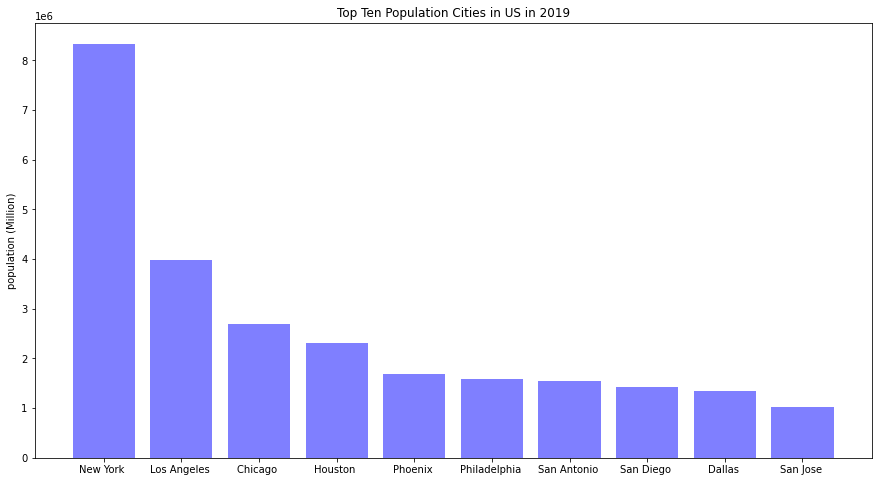

In [19]:
# Population distribution in top 10 US cities
plt.figure(figsize=(15,8))
y_pos=np.arange(len(label))
plt.bar(y_pos,pop_2019_top10, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, label3)
plt.ylabel('population (Million)')
plt.title('Top Ten Population Cities in US in 2019')
plt.show()

In [44]:
# generate time series file for population of Houston and Chicago
df2_two_city = df2.iloc[[3,4]]
drop_column_p = ['Unnamed: 0', 'Unnamed: 1','Census','Estimates Base']
df_two_city_p=df2_two_city.drop(drop_column_p, axis = 1).T
df_two_city_p.rename(columns={3:'Chicago',4:'Houston'},inplace=True)
df_two_city_p.index=pd.to_datetime(df_two_city_p.index,format='%Y')
df_two_city_p

,Chicago,Houston
2010-01-01,2100280.0,1449038.0
2011-01-01,2126032.0,1469796.0
2012-01-01,2161593.0,1499274.0
2013-01-01,2199391.0,1526491.0
2014-01-01,2241826.0,1555445.0
2015-01-01,2286908.0,1583690.0
2016-01-01,2309544.0,1612199.0
2017-01-01,2316750.0,1633560.0
2018-01-01,2318573.0,1654675.0
2019-01-01,2320268.0,1680992.0


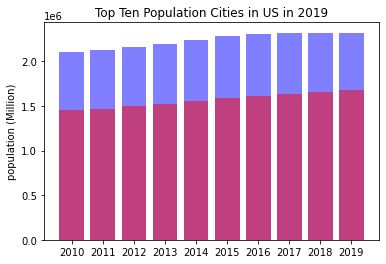

In [58]:
# Population comparison beween Chicago and Houston over the last ten years
ax = plt.subplot(111)
y_pos=np.arange(len(df_two_city_p))
w=0.3
y_label_p=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
ax.bar(y_pos,df_two_city_p['Chicago'], align='center', alpha=0.5, color='blue')
ax.bar(y_pos,df_two_city_p['Houston'], align='center', alpha=0.5, color='red')
plt.xticks(y_pos, y_label_p)
plt.ylabel('population (Million)')
plt.title('Top Ten Population Cities in US in 2019')
plt.show()

# Section 3: Pull GDP and Employment data from the BEA (US Bureau of Economic Analysis) API. BEA published economic statistics using industry-standard methods and procedures.

In [70]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = '8F009184-80B8-4968-B4FF-6E01D5683503'

In [75]:
# Now, call the BEA API and pull out a small sample of the data to get a glimpse
# into the JSON structure that will be returned
url = "https://apps.bea.gov/api/data/?UserID=API_KEY&method=GetParameterValuesFiltered&datasetname=Regional&TargetParameter=LineCode&TableNa"
r = requests.get(url)
json_data = r.json()

In [76]:
json_data

{'BEAAPI': {'Request': {'RequestParam': [{'ParameterName': 'TABLENA',
     'ParameterValue': ''},
    {'ParameterName': 'METHOD',
     'ParameterValue': 'GETPARAMETERVALUESFILTERED'},
    {'ParameterName': 'TARGETPARAMETER', 'ParameterValue': 'LINECODE'},
    {'ParameterName': 'DATASETNAME', 'ParameterValue': 'REGIONAL'},
    {'ParameterName': 'USERID', 'ParameterValue': 'API_KEY'}]},
  'Results': {'Error': {'APIErrorCode': '1',
    'APIErrorDescription': 'Invalid Request - Invalid API UserId.'}}}}

In [ ]:
# collet property tax data